In [83]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Allow matplotlib have access to timestamp 
import matplotlib.ticker as mplticker

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Theoretically,<font face="gotham" color="red"> real wage</font> is quantified by the amount of goods or services that can be bought, but what goods can be used for this quantification? Cigaretts? Or gold? 

However there are no such goods which can be consistently used as unit of measurement for purchasing power. Therefore the best choice is still money itself, but with a twist.

The most usual way to quantify real wage is to adjust previous nominal wages into today's level. We will see how to handle this.

In [ ]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(2006, 3, 1)
end = dt.datetime(2020, 5, 28)
nominalWage = pdr.data.DataReader('CES0500000003', 'fred', start, end)
CPI_Urban = pdr.data.DataReader('CPIAUCSL', 'fred', start, end)

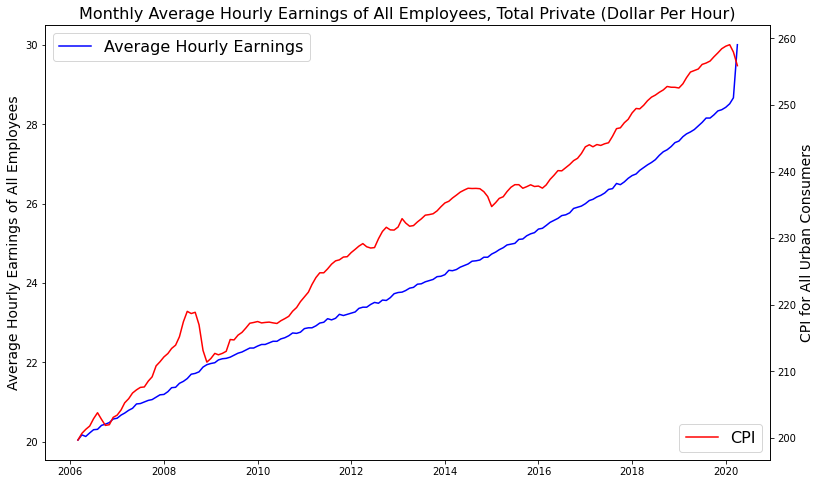

In [19]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(nominalWage, color = 'b', label = 'Average Hourly Earnings')
ax.set_ylabel('Average Hourly Earnings of All Employees', size = 14)

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(CPI_Urban, color = 'r', label = 'CPI')
ax_RHS.set_ylabel('CPI for All Urban Consumers', size = 14)

ax.legend(fontsize = 16)
ax_RHS.legend(fontsize = 16, loc = 'lower right')
ax.set_title('Monthly Average Hourly Earnings of All Employees, Total Private (Dollar Per Hour)', size = 16)
plt.show()

Rename the columns.

In [41]:
nominalWage.columns = ['nominalWage']  # rename the columns
CPI_Urban.columns = ['CPI_Urban']

To adjust previous wages in $t-i$ to current level $t$, we use the formula

$$
\frac{W_{t-i}P_t}{P_{t-i}}=W_{t-i}\frac{P_{t}}{P_{t-i}}
$$

For instance, to adjust wage level in March 2006 to April 2020 level.

In [50]:
realWage2006Mar = (nominalWage.loc['2006-03-01', 'nominalWage'] * CPI_Urban.loc['2020-04-01', 'CPI_Urban'])/CPI_Urban.loc['2006-03-01', 'CPI_Urban']
realWage2006Mar

25.679900250375564

which means the $20.04$ dollars in March 2006 have the purchasing power of $25.67$ in April 2020.

The real wage growth from March 2006 to April 2020 is 

In [51]:
(realWage2006Mar - nominalWage.loc['2006-03-01', 'nominalWage'])/nominalWage.loc['2006-03-01', 'nominalWage'] 

0.2814321482223336

Now let's convert the whole series of nominal wage into real wage based on April 2020.

In [74]:
P = CPI_Urban.loc['2020-4-1', 'CPI_Urban']/CPI_Urban.loc['2006-3-1':'2020-3-1', 'CPI_Urban']
W = nominalWage.loc['2006-03-01':'2020-3-1', 'nominalWage']

In [ ]:
realIncome = pdr.data.DataReader('MEHOINUSA672N', 'fred', start, end)

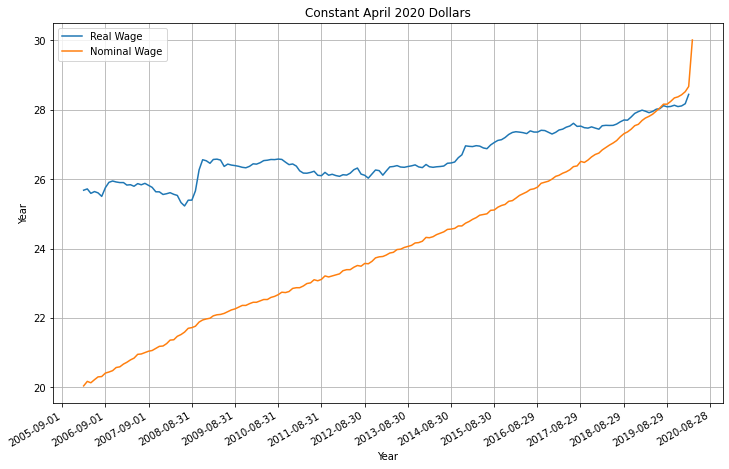

In [88]:
realWage = W*P
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(realWage, label = 'Real Wage')
ax.plot(nominalWage, label = 'Nominal Wage')
ax.set_xlabel('Year')
ax.set_ylabel('Year')
ax.legend()
ax.set_title('Constant April 2020 Dollars')
ax.grid()

loc = mplticker.MultipleLocator(base=365) # Every 365 days a tick
ax.xaxis.set_major_locator(loc)
for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment('right')
plt.show()